# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

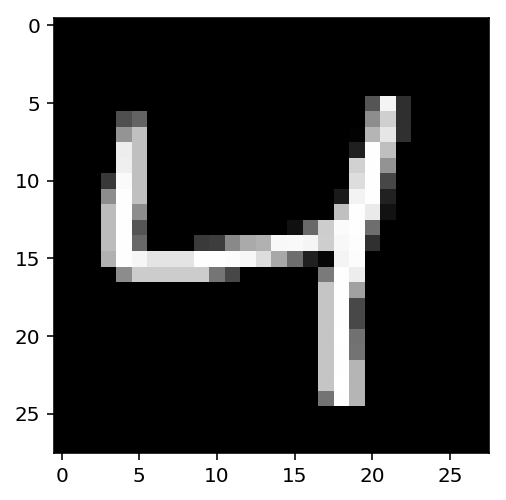

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

In [6]:
image_size = mnist.train.images.shape[1]
print(image_size)

784


In [7]:
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')
print(inputs_)
print(targets_)

Tensor("inputs:0", shape=(?, 784), dtype=float32)
Tensor("targets:0", shape=(?, 784), dtype=float32)


In [8]:
# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)
print(encoded)

Tensor("dense/Relu:0", shape=(?, 32), dtype=float32)


In [9]:
# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
print(logits)

Tensor("dense_2/BiasAdd:0", shape=(?, 784), dtype=float32)


In [10]:
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')
print(decoded)

Tensor("output:0", shape=(?, 784), dtype=float32)


In [11]:
# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
print(loss)

Tensor("logistic_loss:0", shape=(?, 784), dtype=float32)


In [12]:
# Mean of the loss
cost = tf.reduce_mean(loss)
print(cost)

Tensor("Mean:0", shape=(), dtype=float32)


In [13]:
# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)
print(opt)

name: "Adam"
op: "NoOp"
input: "^Adam/update_dense/kernel/ApplyAdam"
input: "^Adam/update_dense/bias/ApplyAdam"
input: "^Adam/update_dense_1/kernel/ApplyAdam"
input: "^Adam/update_dense_1/bias/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



## Training

In [14]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [15]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6965
Epoch: 1/20... Training loss: 0.6927
Epoch: 1/20... Training loss: 0.6892
Epoch: 1/20... Training loss: 0.6855
Epoch: 1/20... Training loss: 0.6812
Epoch: 1/20... Training loss: 0.6765
Epoch: 1/20... Training loss: 0.6705
Epoch: 1/20... Training loss: 0.6638
Epoch: 1/20... Training loss: 0.6546
Epoch: 1/20... Training loss: 0.6456
Epoch: 1/20... Training loss: 0.6356
Epoch: 1/20... Training loss: 0.6240
Epoch: 1/20... Training loss: 0.6116
Epoch: 1/20... Training loss: 0.5936
Epoch: 1/20... Training loss: 0.5793
Epoch: 1/20... Training loss: 0.5634
Epoch: 1/20... Training loss: 0.5490
Epoch: 1/20... Training loss: 0.5279
Epoch: 1/20... Training loss: 0.5099
Epoch: 1/20... Training loss: 0.4958
Epoch: 1/20... Training loss: 0.4755
Epoch: 1/20... Training loss: 0.4580
Epoch: 1/20... Training loss: 0.4419
Epoch: 1/20... Training loss: 0.4251
Epoch: 1/20... Training loss: 0.4090
Epoch: 1/20... Training loss: 0.3906
Epoch: 1/20... Training loss: 0.3829
E

Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1985
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1946
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1935
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1827
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1831
E

Epoch: 2/20... Training loss: 0.1618
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1651
Epoch: 2/20... Training loss: 0.1601
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1629
Epoch: 2/20... Training loss: 0.1648
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1613
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1457
Epoch: 2/20... Training loss: 0.1627
Epoch: 2/20... Training loss: 0.1584
E

Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1309
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1384
E

Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1206
E

Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1116
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1189
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1211
Epoch: 5/20... Training loss: 0.1194
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1181
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1184
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1128
E

Epoch: 5/20... Training loss: 0.1040
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1026
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1096
E

Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1003
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.0990
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1054
E

Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0965
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1051
E

Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0974
E

Epoch: 8/20... Training loss: 0.0911
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0952
E

Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0919
Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0913
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.1008
E

Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0993
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0997
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.1020
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0897
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0899
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0891
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0898
Epoch: 14/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0982
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0893
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0981
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0983
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0981
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0979
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0978
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0997
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

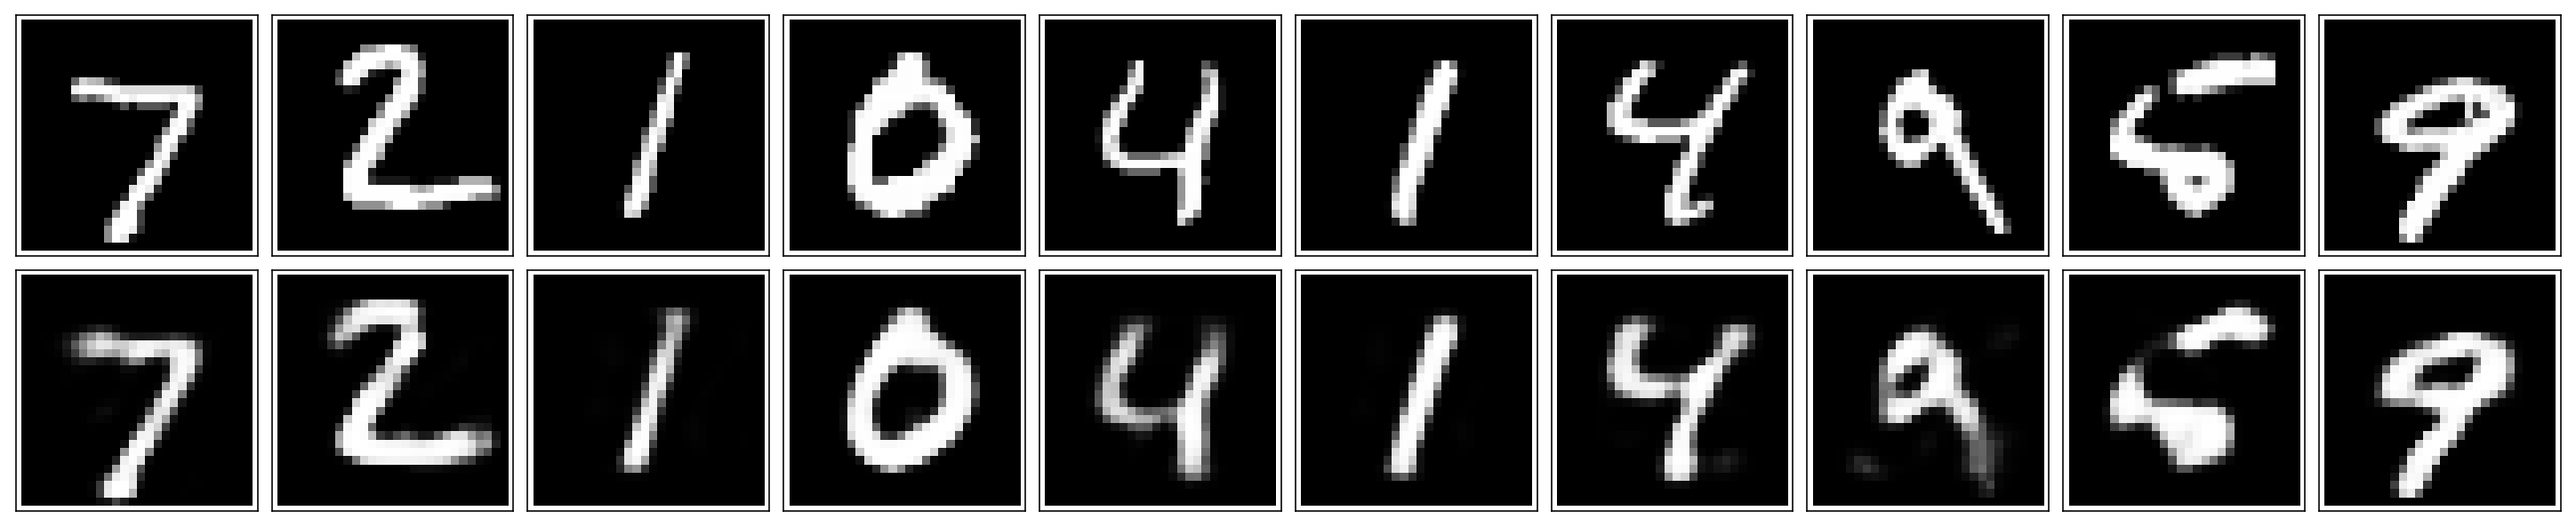

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [17]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.